<a href="https://colab.research.google.com/github/Rahul30032/Neural_Nets/blob/master/LSTM_Sine_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [0]:
model = Sequential()
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

In [0]:
def train_function(x):
    return np.sin(x)

In [0]:
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)

In [5]:
# define input sequence
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (3122, 20, 1)
y.shape = (3122,)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3122 samples
Epoch 1/20
3122/3122 [==============================] - 2s 785us/sample - loss: 0.2732
Epoch 2/20
3122/3122 [==============================] - 1s 414us/sample - loss: 0.0601
Epoch 3/20
3122/3122 [==============================] - 1s 395us/sample - loss: 0.0146
Epoch 4/20
3122/3122 [==============================] - 1s 403us/sample - loss: 0.0100
Epoch 5/20
3122/3122 [==============================] - 1s 399us/sample - loss: 0.0059
Epoch 6/20
3122/3122 [==============================] - 1s 394us/sample - loss: 0.0026
Epoch 7/20
3122/3122 [==============================] - 1s 396us/sample - loss: 0.0010
Epoch 8/20
3122/3122 [==============================] - 1s 398us/sample - loss: 5.3664e-04
Epoch 9/20
3122/3122 [==============================] - 1s 405us/sample - loss: 3.5746e-04
Epoch 10/20


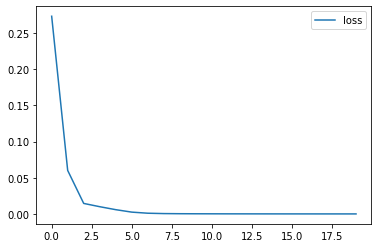

In [6]:
history = model.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()